In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
admissions_df = pd.read_csv('Data/ADMISSIONS.csv')
# df.info()
icu_stays = pd.read_csv('Data/ICUSTAYS.csv')

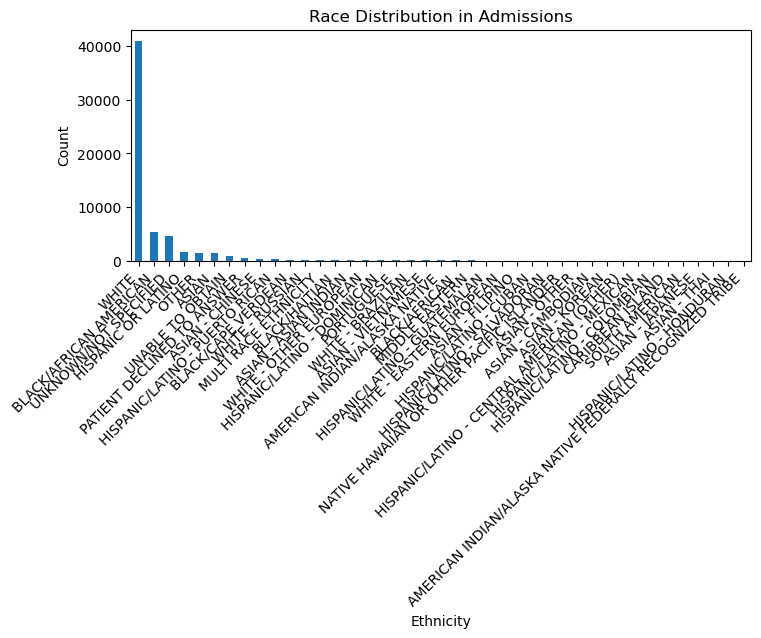

In [68]:
# Ethnicity
ethnicity_counts = admissions_df["ETHNICITY"].value_counts()
plt.figure(figsize=(8, 3))
ethnicity_counts.plot(kind='bar')
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.title("Race Distribution in Admissions")
plt.xticks(rotation=45, ha='right')
plt.show()

In [94]:
ethnicity_counts

ETHNICITY
WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'WHITE'),
  Text(1, 0, 'BLACK'),
  Text(2, 0, 'HISPANIC/LATINO'),
  Text(3, 0, 'ASIAN'),
  Text(4, 0, 'NATIVE'),
  Text(5, 0, 'OTHER')])

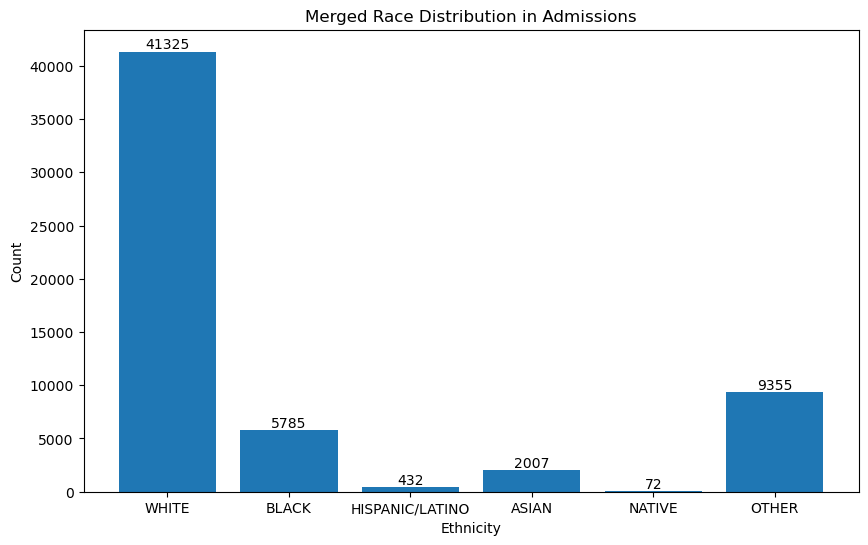

In [92]:
merged_ethnicity_counts = {
    "WHITE": 0,
    "BLACK": 0,
    "HISPANIC/LATINO": 0,
    "ASIAN": 0,
    "NATIVE": 0,
    "OTHER": 0,
}
for ethnicity, count in ethnicity_counts.items():
    if "WHITE" in ethnicity:
        merged_ethnicity_counts["WHITE"] += count
    elif "ASIAN" in ethnicity:
        merged_ethnicity_counts["ASIAN"] += count
    elif "BLACK" in ethnicity:
        merged_ethnicity_counts["BLACK"] += count
    elif "HISPANIC/LATINO" in ethnicity:
        merged_ethnicity_counts["HISPANIC/LATINO"] += count
    elif "NATIVE" in ethnicity:
        merged_ethnicity_counts["NATIVE"] += count
    else:
        merged_ethnicity_counts["OTHER"] += count

merged_ethnicity_series = pd.Series(merged_ethnicity_counts)
plt.figure(figsize=(10, 6))
bars = plt.bar(merged_ethnicity_series.index, merged_ethnicity_series.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', 
             ha='center', va='bottom', fontsize=10)
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.title("Merged Race Distribution in Admissions")
plt.xticks(rotation=360)

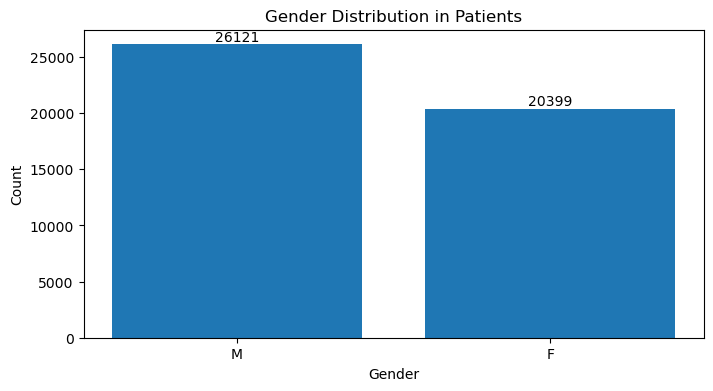

In [90]:
gender_df = admissions_df = pd.read_csv('Data/PATIENTS.csv')
gender_counts = gender_df["GENDER"].value_counts()
plt.figure(figsize=(8, 4))
# GPT: edit the code to show number on top of histogram
bars = plt.bar(gender_counts.index, gender_counts.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', 
             ha='center', va='bottom', fontsize=10)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution in Patients")
plt.xticks(rotation=360)
plt.show()

In [102]:
# What tests are performed on one patient - subjectid = 3
labevents_df = pd.read_csv('Data/LABEVENTS.csv')
patient3_itemid = labevents_df[labevents_df["SUBJECT_ID"] == 3]["ITEMID"].unique() 

In [106]:
patient3_itemid

array([50820, 50800, 50802, 50804, 50808, 50812, 50813, 50818, 50821,
       50825, 50868, 50882, 50893, 50902, 50912, 50931, 50960, 50970,
       50971, 50983, 51006, 51009, 51221, 50861, 50878, 50910, 51137,
       51146, 51200, 51222, 51233, 51244, 51246, 51248, 51249, 51250,
       51252, 51254, 51256, 51265, 51267, 51277, 51278, 51279, 51301,
       51464, 51466, 51478, 51484, 51486, 51487, 51491, 51492, 51498,
       51506, 51508, 51514, 51463, 51476, 51482, 51493, 51512, 51516,
       51519, 50911, 51002, 50863, 50885, 51275, 50816, 50817, 50819,
       50826, 50827, 50828, 50810, 50811, 51237, 51274, 50862, 50867,
       50956, 51007, 51214, 50809, 50822, 50801, 50823, 50824, 50803,
       51143, 51144, 51251, 51255, 51268, 50806, 50908, 50964, 51151,
       51518, 50979, 51087, 51093, 50993, 50994, 51462, 51505, 51497,
       50903, 50904, 50905, 50907, 51000, 50924, 50952, 50953, 50998,
       50887, 50933, 51523, 51266])

In [122]:
labitems_df = pd.read_csv('Data/D_LABITEMS.csv')
patient3_tests = labitems_df[labitems_df["ITEMID"].isin(patient3_itemid)]["LABEL"].unique()
print("Sample tests performed on one patient (SUBJECT_ID = 3):\n", patient3_tests)

Sample tests performed on one patient (SUBJECT_ID = 3):
 ['Amorphous Crystals' 'Bacteria' 'Bilirubin' 'Blood' 'SPECIMEN TYPE'
 'Alveolar-arterial Gradient' 'Base Excess'
 'Calculated Bicarbonate, Whole Blood' 'Calculated Total CO2'
 'Chloride, Whole Blood' 'Free Calcium' 'Glucose' 'Hematocrit, Calculated'
 'Hemoglobin' 'Intubated' 'Lactate' 'Oxygen' 'Oxygen Saturation' 'pCO2'
 'PEEP' 'pH' 'pO2' 'Potassium, Whole Blood' 'Required O2'
 'Sodium, Whole Blood' 'Temperature' 'Tidal Volume' 'Ventilation Rate'
 'Ventilator' 'Alanine Aminotransferase (ALT)' 'Albumin'
 'Alkaline Phosphatase' 'Amylase' 'Anion Gap'
 'Asparate Aminotransferase (AST)' 'Bicarbonate' 'Bilirubin, Total'
 'Blue Top Hold' 'Calcium, Total' 'Chloride'
 'Cholesterol Ratio (Total/HDL)' 'Cholesterol, HDL'
 'Cholesterol, LDL, Calculated' 'Cholesterol, Total' 'CK-MB Index'
 'Creatine Kinase (CK)' 'Creatine Kinase, MB Isoenzyme' 'Creatinine'
 'Ferritin' 'Green Top Hold (plasma)' 'Iron'
 'Iron Binding Capacity, Total' 'Lipase' 'M